In [75]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

# 1. 마피아 게임 시뮬레이션 함수
* input: 총플레이어 수, 마피아 수
* output: 마피아가 승리할 확률(%)

In [76]:
def play_mafia_simple(pla_num, maf_num):   #player수, mafia수를 입력받는다.
    
    #승리 횟수를 count해주는 변수
    mafia_wins = 0    
    citizen_wins = 0
      
    for i in range(0,10000): #시뮬레이션게임 10000번진행
        
        players_num = pla_num
        mafia_num = maf_num
        citizen_num = pla_num - maf_num
        
        players = {"mafia": mafia_num, "citizen": players_num - mafia_num} #딕셔너리의 각 value값을 남은 인원으로 한다.

        for j in range(1, pla_num):
            
            #낮       
            if j % 2 == 1: 
                # 확률을 동일하게 플레이어중 한명을 지목하여 죽인다.
                if random.randint(1, players_num) <= players["mafia"]:
                    players["mafia"] = players["mafia"] - 1
                else:
                    players["citizen"] = players["citizen"] - 1

                players_num = players_num - 1
                
            #밤
            if j % 2 == 0: 
                players["citizen"] = players["citizen"] - 1
                players_num = players_num - 1
                if players["mafia"] >= players["citizen"]:
                    mafia_wins = mafia_wins + 1
                    break
                if players["mafia"] == 0:
                    citizen_wins = citizen_wins + 1
                    break
   
    return mafia_wins / 100 # 마피아 승리 확률(%)


# 2. Experiments

## Experiment 1
(1) 전제<br>
i. 총 Player 수 50명으로 고정<br>
ii. Mafia 수를 1명 ~ 24명까지 (Mafia수가 25명이상이면 게임이 바로 끝나므로) 늘리면서 각각의 경우에 Mafia가 이길 평균확률을 구한다.<br>
(2) 목표<br>
이때 Mafia가 이길 평균확률의 변화 추이를 시각화 및 분석해본다.<br>


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


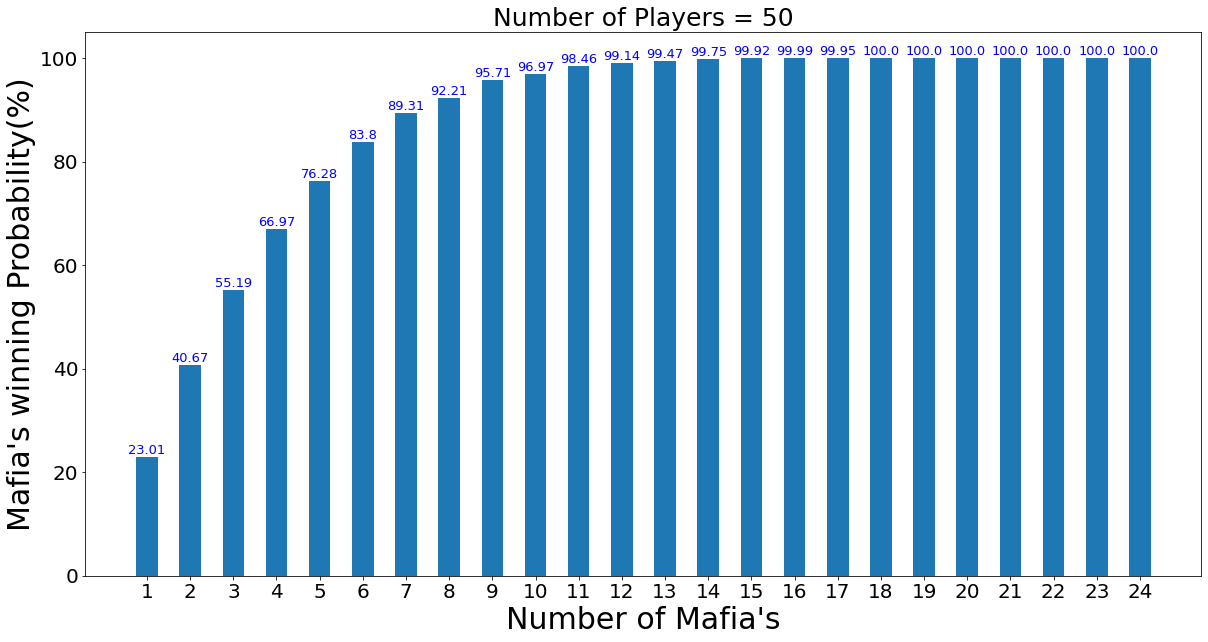

In [4]:
hist_simplemafia_2 = {}

for x in range(1, 25):
    hist_simplemafia_2[x] = play_mafia_simple(50, x)

plt.bar(list(hist_simplemafia_2.keys()), list(hist_simplemafia_2.values()), align = 'center', width = 0.5)
plt.title("Number of Players = 50", fontsize=25)
plt.xlabel("Number of Mafia's")
plt.ylabel("Mafia's winning Probability(%)")
plt.xticks(range(1,25))

for i, v in enumerate(list(hist_simplemafia_2.keys())):
    plt.text(v, list(hist_simplemafia_2.values())[i], 
             np.round(list(hist_simplemafia_2.values())[i], 2),                 
             fontsize = 13, 
             color='blue',
             horizontalalignment='center',  
             verticalalignment='bottom')   
plt.rcParams["figure.figsize"] = (20,10)

plt.rc('axes', labelsize=30)   
plt.rc('xtick', labelsize=20)  
plt.rc('ytick', labelsize=20)  



plt.show()
plt.close()

## Experiment 2
(1) 전제 <br>
i. 총 Mafia 수 1명으로 고정 <br>
ii. 총 Player 수를 3명 ~ 20명까지 늘리면서 각각의 경우에 Mafia가 이길 평균확률을 구한다. <br>
(2) 목표 <br>
이때 Mafia가 이길 평균확률의 변화 추이를 시각화 및 분석해본다. <br>


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


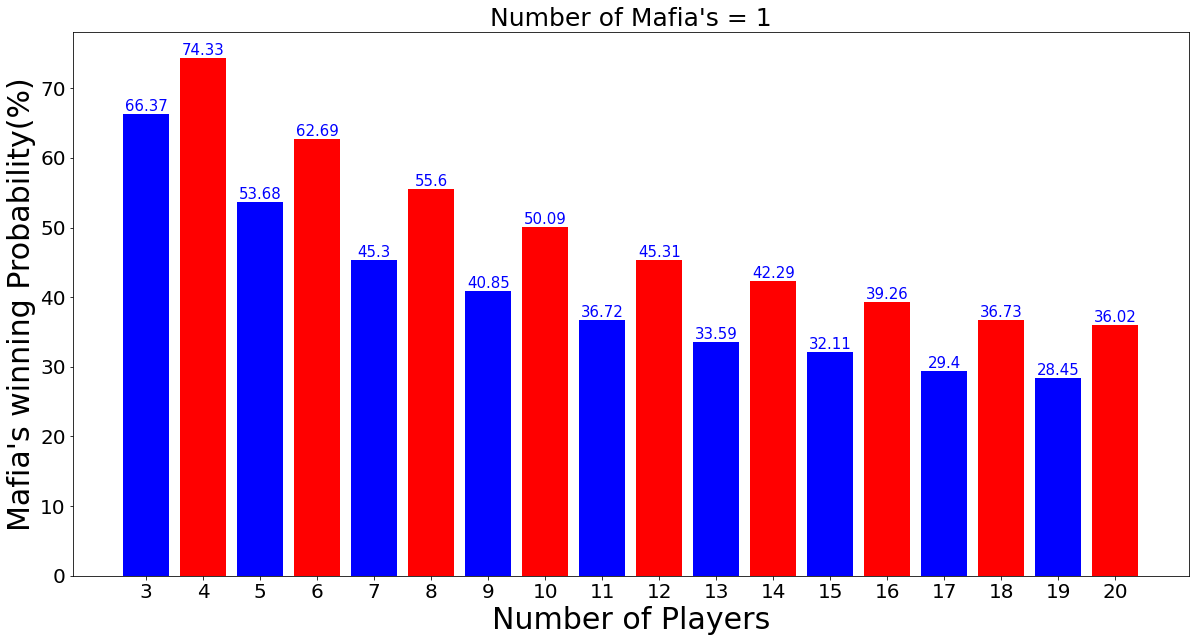

In [5]:
from matplotlib import pyplot as plt
hist_simplemafia = {}

for x in range(3, 21):
    hist_simplemafia[x] = play_mafia_simple(x, 1)

colors = ['blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red']
plt.bar(list(hist_simplemafia.keys()), list(hist_simplemafia.values()), align = 'center', width = 0.8, 
        color = colors)
plt.title("Number of Mafia's = 1", fontsize=25)
plt.xlabel("Number of Players")
plt.ylabel("Mafia's winning Probability(%)")
plt.xticks(range(3,21))

for i, v in enumerate(list(hist_simplemafia.keys())):
    plt.text(v, list(hist_simplemafia.values())[i], list(hist_simplemafia.values())[i],                 
             fontsize = 15, 
             color='blue',
             horizontalalignment='center',  
             verticalalignment='bottom')    
    
    
plt.rcParams["figure.figsize"] = (20,8)
plt.rc('axes', labelsize=30)   
plt.rc('xtick', labelsize=20)   
plt.rc('ytick', labelsize=20)  

plt.show()
plt.close()

## Experiment 3
(1) 전제<br>
1st 총 Mafia수가 총 Player수의 20%로 일정 하게하기 위해 총 Mafia 수는 n명(n은 정수), 총 Player수는 5n명으로 설정한다.<br>
2nd   이때 위의 20%비율을 유지하면서 총 Mafia수(x축 variable)를 1명 ~ 10명까지 늘리면서 각각의 경우에 Mafia가 이길 확률을 구한다.<br>
(2) 목표<br>
이때 Mafia가 이길 평균확률의 변화 추이를 관측 및 분석해본다.<br>



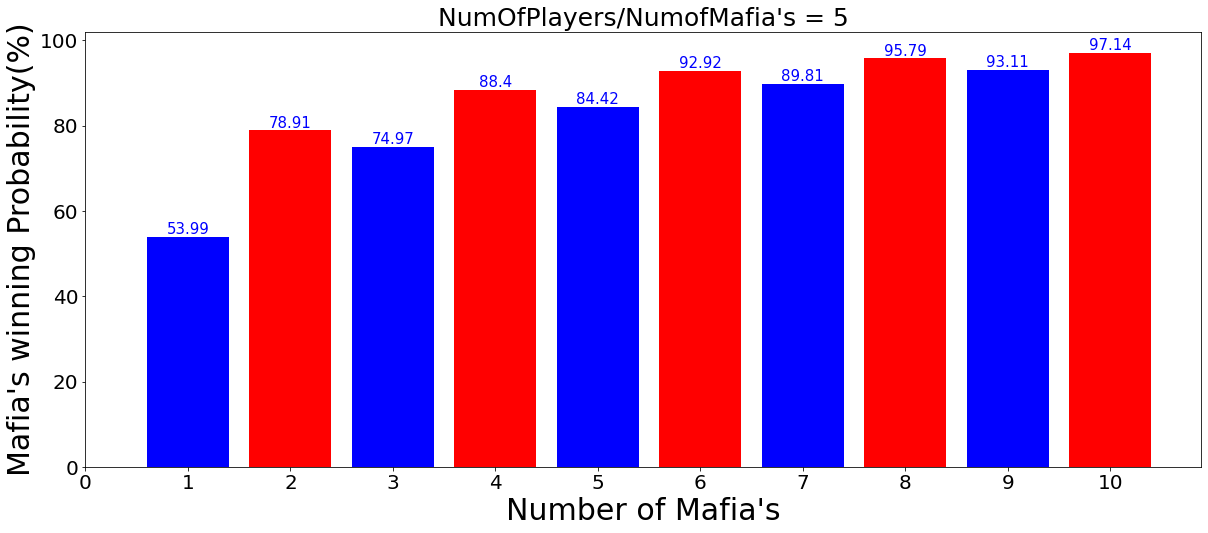

In [6]:
hist_simplemafia_3 = {}
for x in range(1, 11):
    hist_simplemafia_3[x] = play_mafia_simple(5*x, x)
from matplotlib import pyplot as plt

colors = ['blue','red','blue','red','blue','red','blue','red','blue','red']
plt.bar(list(hist_simplemafia_3.keys()), list(hist_simplemafia_3.values()), align = 'center', width = 0.8, color = colors)
plt.title("NumOfPlayers/NumofMafia's = 5", fontsize=25)
plt.xlabel("Number of Mafia's")
plt.ylabel("Mafia's winning Probability(%)")
plt.xticks(np.arange(0, 11, step=1))


for i, v in enumerate(list(hist_simplemafia_3.keys())):
    plt.text(v, list(hist_simplemafia_3.values())[i], list(hist_simplemafia_3.values())[i],                 
             fontsize = 15, 
             color='blue',
             horizontalalignment='center',  
             verticalalignment='bottom')   

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

plt.show()
plt.close()

# 3. Mathmatical Function
* 논문 "https://arxiv.org/pdf/1009.1031.pdf"을 참고하면 
* 총 플레이어수: n, 마피아수: m 일때 Mafia(n,m)의 출력을 Mafia가 이길 확률이라하면 수학적 수식은 다음과 같다.
* Mafia(n,m)
    * = 0     (if m = 0)
    * = 1 (if m >= n - m)
    * = $\frac{n-m}{n}$Mafia(n-2, m) + $\frac{m}{n}$Mafia(n-2, m-1) (그 외 모든 경우)
* 이를 파이썬으로 작성하고 시각화 해보자.

In [7]:
def Mafia(n, m):
    if m == 0:
        return 0
    if m >= n-m:
        return 1
    return ((n-m)/n)*Mafia(n-2, m) + (m/n)*Mafia(n-2, m-1)

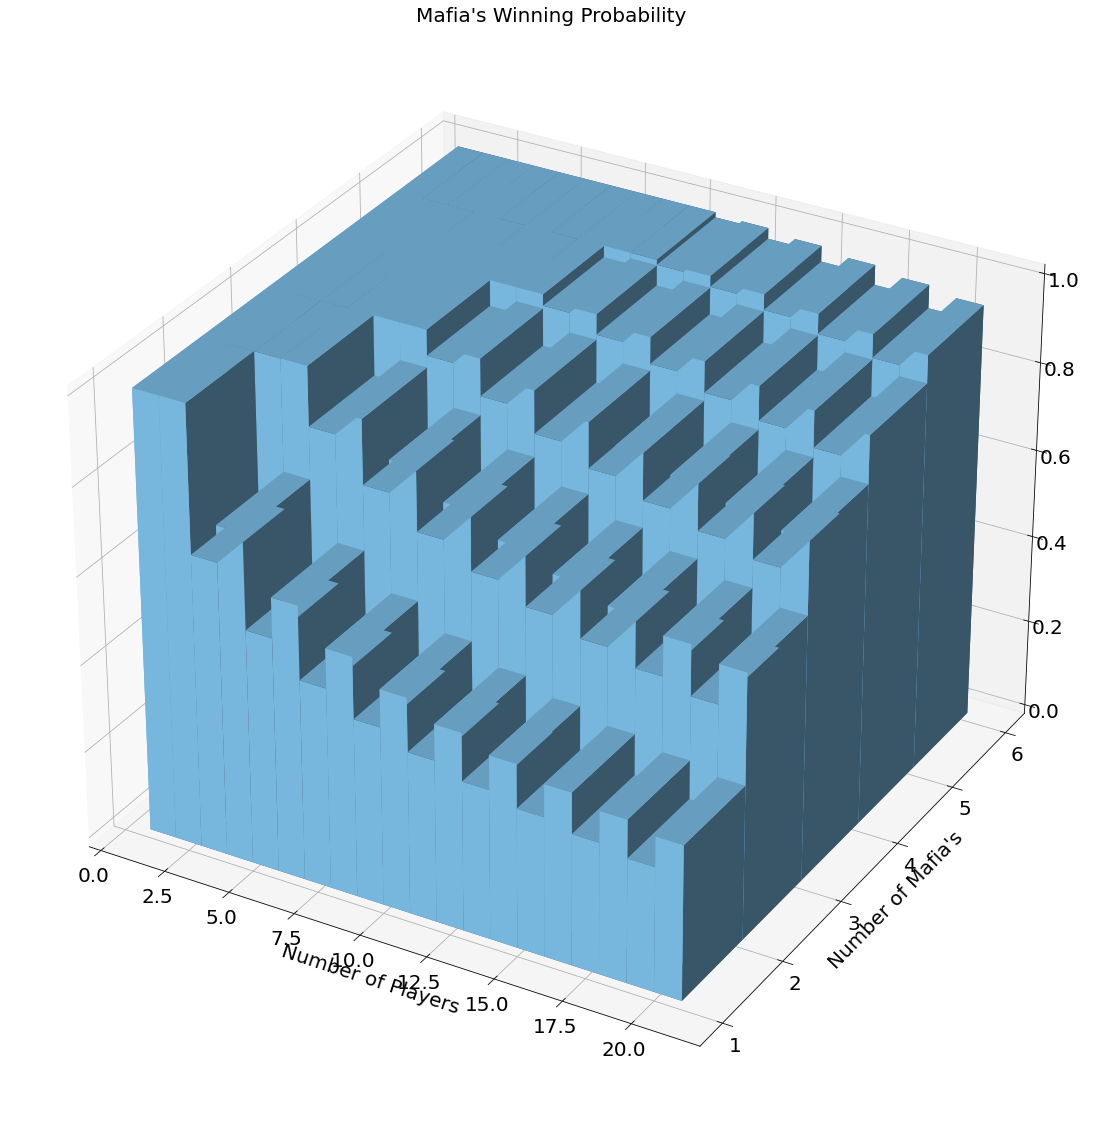

In [74]:
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(121, projection='3d')


_n = np.arange(1, 21) # Number of Players
_m = np.arange(1, 6)  # Number of Mafia's
_nn, _mm = np.meshgrid(_n, _m)
n, m = _nn.ravel(), _mm.ravel()

p = []


for i in range(n.size):
    p.append(Mafia(n[i], m[i]))         

p = np.array(p)


bottom = np.zeros_like(p)
width = depth = 1

ax.bar3d(n, m, bottom, width, depth, p, shade=True, color='lightskyblue')
ax.set_title('Mafia\'s Winning Probability', fontsize=20)
ax.set_xlabel('Number of Players', fontsize=20)
ax.set_ylabel('Number of Mafia\'s', fontsize=20)
plt.show()

